## Importing necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from glob import glob
import pathlib
from pathlib import Path

import random
import shutil

import torch
import torchvision
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
from torch import nn

from sklearn.model_selection import train_test_split

from PIL import Image, ImageChops, ImageEnhance

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## Data Processing and conversion

In [3]:
total_files = glob("Dataset/**/*", recursive=True)
print(
    f"Total files in the directory (including Authenticated and Tempered): {len(total_files)}"
)

jpg_files = glob("Dataset/**/*.jpg", recursive=True)
print(f"Total jpg files in the directory: {len(jpg_files)}")

bmp_files = glob("Dataset/**/*.bmp", recursive=True)
print(f"Total bmp files in directory: {len(bmp_files)}")

tif_files = glob("Dataset/**/*.tif", recursive=True)
print(f"Total tif files in the directory: {len(tif_files)}")

Total files in the directory (including Authenticated and Tempered): 25182
Total jpg files in the directory: 19002
Total bmp files in directory: 54
Total tif files in the directory: 6118


In [4]:
def walk_through_dir(dir_path):
    """
    Walks through dir_path returning its contents.
    Args:
      dir_path (str or pathlib.Path): target directory

    Returns:
      A print out of:
        number of subdiretories in dir_path
        number of images (files) in each subdirectory
        name of each subdirectory
    """
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(
            f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'."
        )

In [5]:
jpg_files[:5]

['Dataset\\Au\\Au_ani_00001.jpg',
 'Dataset\\Au\\Au_ani_00002.jpg',
 'Dataset\\Au\\Au_ani_00003.jpg',
 'Dataset\\Au\\Au_ani_00004.jpg',
 'Dataset\\Au\\Au_ani_00005.jpg']

### Creating a function to convert original image to ELA image

In [6]:
def convert_to_ela_image(image_path: str, output_path=None, quality=90):
    """Converts an RGB image to an ELA image by calculating the difference between the original and compressed images.

    Args:
        image_path (str): Path to the input image.
        output_path (str, optional): Path to save the ELA image. If None, the image won't be saved.
        quality (int, optional): JPEG compression quality. Defaults to 90.

    Returns:
        PIL.Image.Image: The generated ELA image.
    """
    temp_file = "temp_ela.jpg"

    # Open and save a compressed version of the image
    image = Image.open(image_path).convert("RGB")
    image.save(temp_file, "JPEG", quality=quality)

    # Open both original and compressed images
    compressed = Image.open(temp_file)
    diff = ImageChops.difference(image, compressed)

    # Normalize the difference
    extrema = diff.getextrema()
    max_diff = max(ex[1] for ex in extrema) if extrema else 1
    scale = 255.0 / max_diff if max_diff > 0 else 1
    diff = ImageEnhance.Brightness(diff).enhance(scale)
    print(f"Max pixel difference in ELA: {max_diff}")
    plt.imshow(diff)
    # Remove the temp file
    os.remove(temp_file)

    # Save the ELA image if output_path is provided
    if output_path:
        diff.save(output_path)

    return diff


In [7]:
images = jpg_files
images.extend(bmp_files)
images.extend(tif_files)
len(images)

25174

In [8]:
def find_au_tp_files(files):
    """Returns total number of authenticated and tempered files

    Args:
        images (str): _description_
    """
    total_au, total_tp = 0, 0
    for file in files:
        file_name = os.path.basename(file)
        if file_name.startswith("Tp"):
            total_tp += 1
        else:
            total_au += 1

    return total_au, total_tp


au_files, tp_files = find_au_tp_files(images)
print(f"Total Au files: {au_files}")
print(f"Total Tp files: {tp_files}")

Total Au files: 14928
Total Tp files: 10246


### Creating a function to create an ELA dataset

In [9]:
def create_ela_dataset(input_dir, output_dir, quality=90):
    """
    Generate ELA images for all images in a directory.
    Args:
        input_dir: Directory containing original images.
        output_dir: Directory to save ELA images.
        quality: Compression quality for JPEG.
    """
    if os.path.exists(output_dir):
        print(f"ELA image already exists: {output_dir}")
        return

    os.makedirs(output_dir, exist_ok=True)
    for filename in os.listdir(input_dir):
        if filename.endswith((".jpg", ".tif", ".png")):
            image_path = os.path.join(input_dir, filename)
            ela_image = convert_to_ela_image(image_path, quality)
            ela_image.save(os.path.join(output_dir, filename))

In [10]:
create_ela_dataset(
    "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\Au",
    "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset\Au",
)
create_ela_dataset(
    "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\Tp",
    "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset\Tp",
)

ELA image already exists: D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset\Au
ELA image already exists: D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset\Tp


<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:3: SyntaxWarning: invalid escape sequence '\P'
<>:6: SyntaxWarning: invalid escape sequence '\P'
<>:7: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4122548266.py:2: SyntaxWarning: invalid escape sequence '\P'
  "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\Au",
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4122548266.py:3: SyntaxWarning: invalid escape sequence '\P'
  "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset\Au",
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4122548266.py:6: SyntaxWarning: invalid escape sequence '\P'
  "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\Tp",
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4122548266.

In [11]:
ela_au_files, ela_tp_files = find_au_tp_files(images)
print(f"Total Au files: {ela_au_files}")
print(f"Total Tp files: {ela_tp_files}")

Total Au files: 14928
Total Tp files: 10246


In [12]:
total_au_files = glob(
    "D:\\PROJECTS\\Image-Forgery-Detection-Using-PyTorch\Dataset\\ELA_Dataset\\Au\\*"
)
total_tp_files = glob(
    "D:\\PROJECTS\\Image-Forgery-Detection-Using-PyTorch\\Dataset\\ELA_Dataset\\Tp\\*"
)
ela_au_counts = find_au_tp_files(total_au_files)
ela_tp_counts = find_au_tp_files(total_tp_files)

print(f"Total ELA Au files: {ela_au_counts}")
print(f"Total ELA Tp files: {ela_tp_counts}")

Total ELA Au files: (7437, 0)
Total ELA Tp files: (0, 5123)


<>:2: SyntaxWarning: invalid escape sequence '\D'
<>:2: SyntaxWarning: invalid escape sequence '\D'
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\3283185856.py:2: SyntaxWarning: invalid escape sequence '\D'
  "D:\\PROJECTS\\Image-Forgery-Detection-Using-PyTorch\Dataset\\ELA_Dataset\\Au\\*"


## Perform train test split on ELA images to make it compatible with ImageFolder

In [13]:
def split_dataset(input_dir, output_dir, test_size=0.2):
    """
    Split the dataset into train and test folders for use with ImageFolder.
    Args:
        input_dir (str): Path to the input directory.
        output_dir (str): Path to the output directory.
        test_size (float): Proportion of data to use for the test set.
    """
    if os.path.exists(output_dir):
        print(f"Test and train folders already exists: {output_dir}...... skipping.")
        return

    # Create train and test directories
    train_dir = os.path.join(output_dir, "train")
    test_dir = os.path.join(output_dir, "test")
    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Iterate through each class (subfolder) in the input directory
    for class_name in os.listdir(input_dir):
        class_path = os.path.join(input_dir, class_name)
        if not os.path.isdir(class_path):
            continue

        # List all files in the class folder
        images = [
            f
            for f in os.listdir(class_path)
            if os.path.isfile(os.path.join(class_path, f))
        ]
        train_images, test_images = train_test_split(
            images, test_size=test_size, random_state=42
        )

        # Create class folders in train and test directories
        train_class_dir = os.path.join(train_dir, class_name)
        test_class_dir = os.path.join(test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Move images to train and test directories
        for image in train_images:
            shutil.copy(
                os.path.join(class_path, image), os.path.join(train_class_dir, image)
            )
        for image in test_images:
            shutil.copy(
                os.path.join(class_path, image), os.path.join(test_class_dir, image)
            )

        print(
            f"Class '{class_name}' - {len(train_images)} train images, {len(test_images)} test images."
        )

In [14]:
input_dir = "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset"  # Path to the ELA dataset (e.g., ELA_Dataset/)
output_dir = "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\ela-data-train-test"  # Path where train/test folders will be created
split_dataset(input_dir, output_dir, test_size=0.2)

Test and train folders already exists: D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\ela-data-train-test...... skipping.


<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
<>:1: SyntaxWarning: invalid escape sequence '\P'
<>:2: SyntaxWarning: invalid escape sequence '\P'
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4252403398.py:1: SyntaxWarning: invalid escape sequence '\P'
  input_dir = "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\Dataset\ELA_Dataset"  # Path to the ELA dataset (e.g., ELA_Dataset/)
C:\Users\vishw\AppData\Local\Temp\ipykernel_7144\4252403398.py:2: SyntaxWarning: invalid escape sequence '\P'
  output_dir = "D:\PROJECTS\Image-Forgery-Detection-Using-PyTorch\ela-data-train-test"  # Path where train/test folders will be created


In [15]:
data_path = Path("ela-data-train-test")
image_path = data_path
train_dir = image_path / "train"
test_dir = image_path / "test"

In [16]:
train_dir, test_dir

(WindowsPath('ela-data-train-test/train'),
 WindowsPath('ela-data-train-test/test'))

### Visualizing an image

Random image path: ela-data-train-test\train\Au\Au_cha_20024.jpg
Image class: Au
Image height: 450
Image width: 600


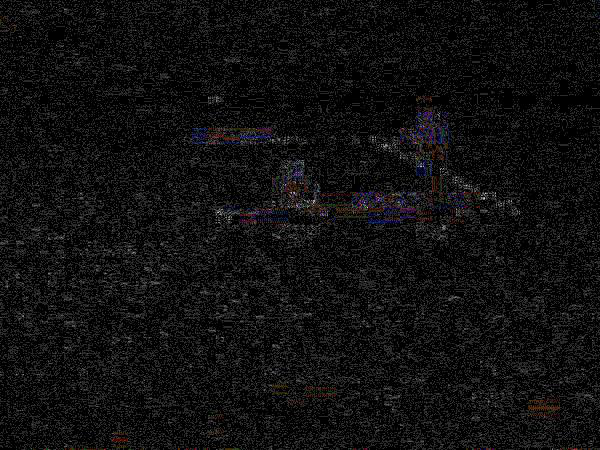

In [17]:
# 1.Get all image path
image_path_list = list(image_path.glob("*/*/*.*"))

# 2. Pick a radom image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

(np.float64(-0.5), np.float64(255.5), np.float64(383.5), np.float64(-0.5))

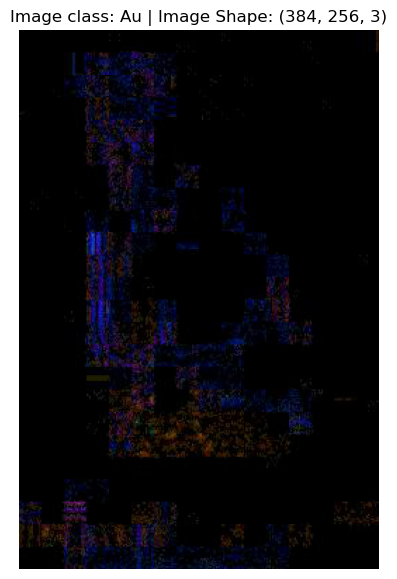

In [161]:
img_as_array = np.asarray(img)
img_as_array

plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Image class: {image_class} | Image Shape: {img_as_array.shape}")
plt.axis(False)

## Transforming data

1. Turn our target data into tensors(numerical form to perform calculations).
2. Resize the image to 224x224.

### Transforming data with `torchvision.transforms`

In [18]:
data_transform = transforms.Compose(
    [transforms.Resize(size=(224, 224)), transforms.ToTensor()]
)

In [19]:
data_transform(img).shape

torch.Size([3, 224, 224])

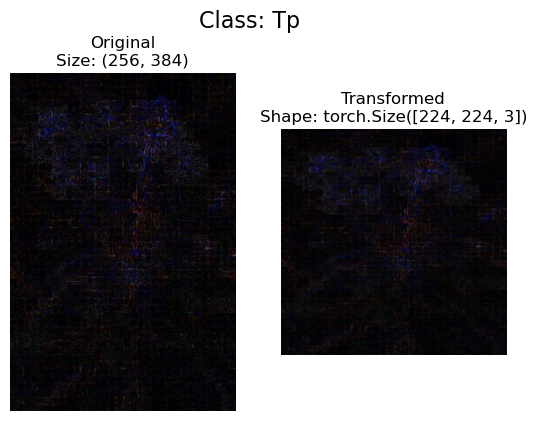

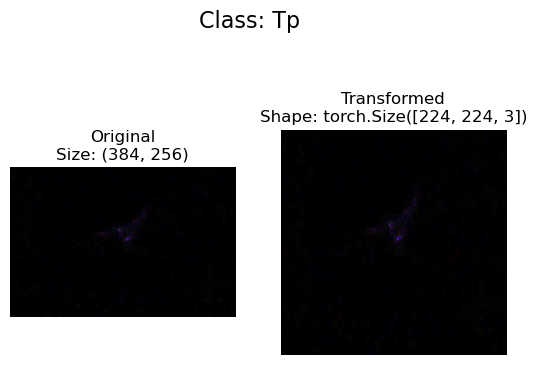

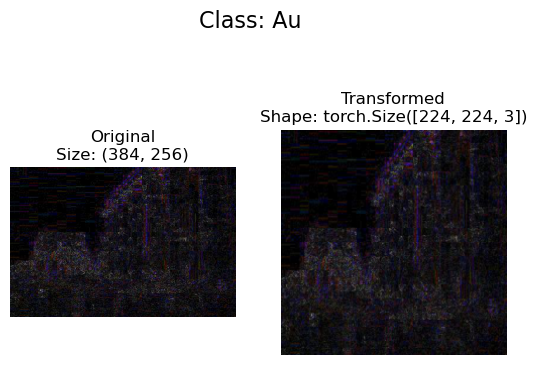

In [20]:
def plot_transformed_image(image_paths: list, transform, n=3, seed=None):
    """Plots a series of random images from image_path

    will open n image path from image_paths, transforms them and plot them side by side.

    Args:
        images_paths (list): List of target images path
        tranform (_type_): Transforms to apply to images.
        n (int, optional): Number of images to plot. Defaults to 3.
        seed (_type_, optional): Random seed for the random generator. Defaults to None.
    """
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fg, ax = plt.subplots(nrows=1, ncols=2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\nSize: {f.size}")
            ax[0].axis(False)

            transformed_image = transform(f).permute(1, 2, 0)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed\nShape: {transformed_image.shape}")
            ax[1].axis(False)

            fg.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_image(image_paths=image_path_list, transform=data_transform, seed=42)

## Load images using `datasets.ImageFolder`

In [21]:
train_data = datasets.ImageFolder(
    root=train_dir, transform=data_transform, target_transform=None
)

test_data = datasets.ImageFolder(
    root=test_dir, transform=data_transform, target_transform=None
)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 10048
     Root location: ela-data-train-test\train
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 2513
     Root location: ela-data-train-test\test
     StandardTransform
 Transform: Compose(
                Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
                ToTensor()
            ))

In [22]:
class_names = train_data.classes
class_names

['Au', 'Tp']

In [23]:
class_dict = train_data.class_to_idx
class_dict

{'Au': 0, 'Tp': 1}

In [24]:
img, label = train_data[0][0], train_data[0][1]
img

tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0196, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0235, 0.0275],
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0392, 0.0510],
         ...,
         [0.0235, 0.0157, 0.0157,  ..., 0.0118, 0.0078, 0.0118],
         [0.0196, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0039],
         [0.0118, 0.0157, 0.0118,  ..., 0.0118, 0.0078, 0.0157]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0235, 0.0157, 0.0196],
         [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0235, 0.0431],
         [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0392, 0.0588],
         ...,
         [0.0314, 0.0235, 0.0196,  ..., 0.0078, 0.0078, 0.0118],
         [0.0235, 0.0118, 0.0157,  ..., 0.0078, 0.0078, 0.0039],
         [0.0196, 0.0196, 0.0157,  ..., 0.0078, 0.0078, 0.0157]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0588, 0.0706],
         [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0667, 0.1098],
         [0.0000, 0.0000, 0.0000,  ..., 0.0588, 0.0824, 0.

In [25]:
class_names[label]

'Au'

In [26]:
print(f"Image tensor: {img}")
print(f"Image shape: {img.shape}")
print(f"Image datatype: {img.dtype}")
print(f"Image label: {label}")
print(f"Label datatype: {type(label)}")

Image tensor: tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0431, 0.0196, 0.0078],
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0235, 0.0275],
         [0.0000, 0.0000, 0.0000,  ..., 0.0353, 0.0392, 0.0510],
         ...,
         [0.0235, 0.0157, 0.0157,  ..., 0.0118, 0.0078, 0.0118],
         [0.0196, 0.0078, 0.0078,  ..., 0.0118, 0.0078, 0.0039],
         [0.0118, 0.0157, 0.0118,  ..., 0.0118, 0.0078, 0.0157]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0235, 0.0157, 0.0196],
         [0.0000, 0.0000, 0.0000,  ..., 0.0196, 0.0235, 0.0431],
         [0.0000, 0.0000, 0.0000,  ..., 0.0392, 0.0392, 0.0588],
         ...,
         [0.0314, 0.0235, 0.0196,  ..., 0.0078, 0.0078, 0.0118],
         [0.0235, 0.0118, 0.0157,  ..., 0.0078, 0.0078, 0.0039],
         [0.0196, 0.0196, 0.0157,  ..., 0.0078, 0.0078, 0.0157]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0627, 0.0588, 0.0706],
         [0.0000, 0.0000, 0.0000,  ..., 0.0471, 0.0667, 0.1098],
         [0.0000, 0.0000, 0.0000,  ..., 0.05

Original shape: torch.Size([3, 224, 224])
Permuted image: torch.Size([224, 224, 3])


Text(0.5, 1.0, 'Au')

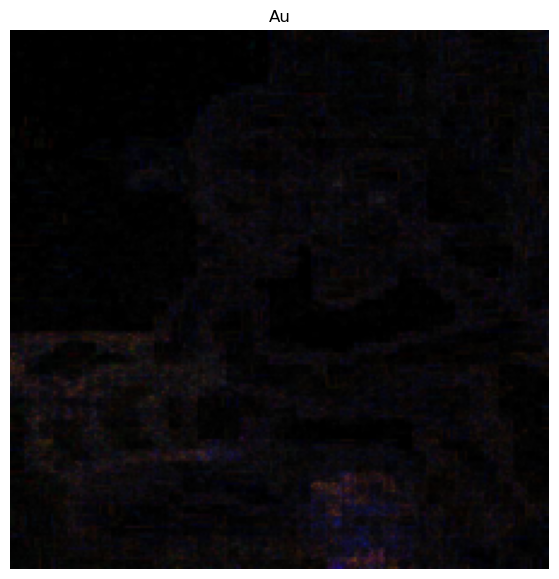

In [27]:
img_permute = img.permute(1, 2, 0)
print(f"Original shape: {img.shape}")
print(f"Permuted image: {img_permute.shape}")
plt.figure(figsize=(10, 7))
plt.imshow(img_permute)
plt.axis("off")
plt.title(class_names[label])

### Convert loaded images into `DataLoader`

In [28]:
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)

test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x1ebfd13cc20>,
 <torch.utils.data.dataloader.DataLoader at 0x1ebfd41c410>)

In [29]:
len(train_dataloader), len(test_dataloader)

(314, 79)

In [30]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, heigth, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([32, 3, 224, 224]) -> [batch_size, color_channels, heigth, width]
Label shape: torch.Size([32])


## PreTrained Model ResNet50

In [34]:
from torchvision import models
# Load pretrained resnet50 model
preTrainedModel = models.resnet50(pretrained = True)

c:\Users\vishw\miniconda3\envs\myenv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\vishw\miniconda3\envs\myenv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\vishw/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:05<00:00, 19.9MB/s]


In [36]:
# Freeze all layers(feature extraction)
for param in preTrainedModel.parameters():
    param.requires_grad = False

In [ ]:
    # Modify final layer for binary classification
    preTrainedModel.fc = nn.Linear(preTrainedModel.fc.in_features, 1)
    preTrainedModel = preTrainedModel.to(device)

In [46]:
# Set loss and optimizer
import torch.optim as optim
loss_fn = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(preTrainedModel.fc.parameters(), lr = 1e-4)


In [49]:
def train(model, train_loader, test_loader, epochs=40):
    best_acc = 0.0
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        for images, labels in train_loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            preds = torch.sigmoid(outputs).squeeze() > 0.5
            correct += (preds == labels.squeeze()).sum().item()
            total += labels.size(0)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)

        # Evaluate
        test_loss, test_acc = evaluate(model, test_loader, return_loss=True)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

        print(f"Epoch [{epoch+1}/{epochs}] | Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}%")
        print(f"               | Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.2f}%")

        if test_acc > best_acc:
            best_acc = test_acc
            torch.save(model.state_dict(), "resnet50_forgery.pt")
            print("Saved best model!")

    # Plot using your custom function
    plot_loss_curves(results)


In [50]:
def evaluate(model, loader, return_loss=False):
    model.eval()
    correct = 0
    total = 0
    total_loss = 0.0

    with torch.no_grad():
        for images, labels in loader:
            images = images.to(device)
            labels = labels.float().unsqueeze(1).to(device)

            outputs = model(images)
            loss = loss_fn(outputs, labels)
            total_loss += loss.item()

            preds = torch.sigmoid(outputs).squeeze() > 0.5
            correct += (preds == labels.squeeze()).sum().item()
            total += labels.size(0)

    acc = 100 * correct / total
    avg_loss = total_loss / len(loader)

    if return_loss:
        return avg_loss, acc
    return acc


Epoch [1/40] | Train Loss: 0.2838, Train Acc: 87.85%
               | Test Loss: 0.2581, Test Acc: 89.65%
Saved best model!
Epoch [2/40] | Train Loss: 0.2822, Train Acc: 88.18%
               | Test Loss: 0.2566, Test Acc: 89.22%
Epoch [3/40] | Train Loss: 0.2817, Train Acc: 87.84%
               | Test Loss: 0.2548, Test Acc: 89.69%
Saved best model!
Epoch [4/40] | Train Loss: 0.2824, Train Acc: 88.09%
               | Test Loss: 0.2521, Test Acc: 89.77%
Saved best model!
Epoch [5/40] | Train Loss: 0.2833, Train Acc: 87.98%
               | Test Loss: 0.2548, Test Acc: 89.30%
Epoch [6/40] | Train Loss: 0.2731, Train Acc: 88.53%
               | Test Loss: 0.2527, Test Acc: 89.49%
Epoch [7/40] | Train Loss: 0.2784, Train Acc: 88.19%
               | Test Loss: 0.2506, Test Acc: 89.73%
Epoch [8/40] | Train Loss: 0.2754, Train Acc: 88.22%
               | Test Loss: 0.2502, Test Acc: 89.81%
Saved best model!
Epoch [9/40] | Train Loss: 0.2794, Train Acc: 88.20%
               | Test Loss:

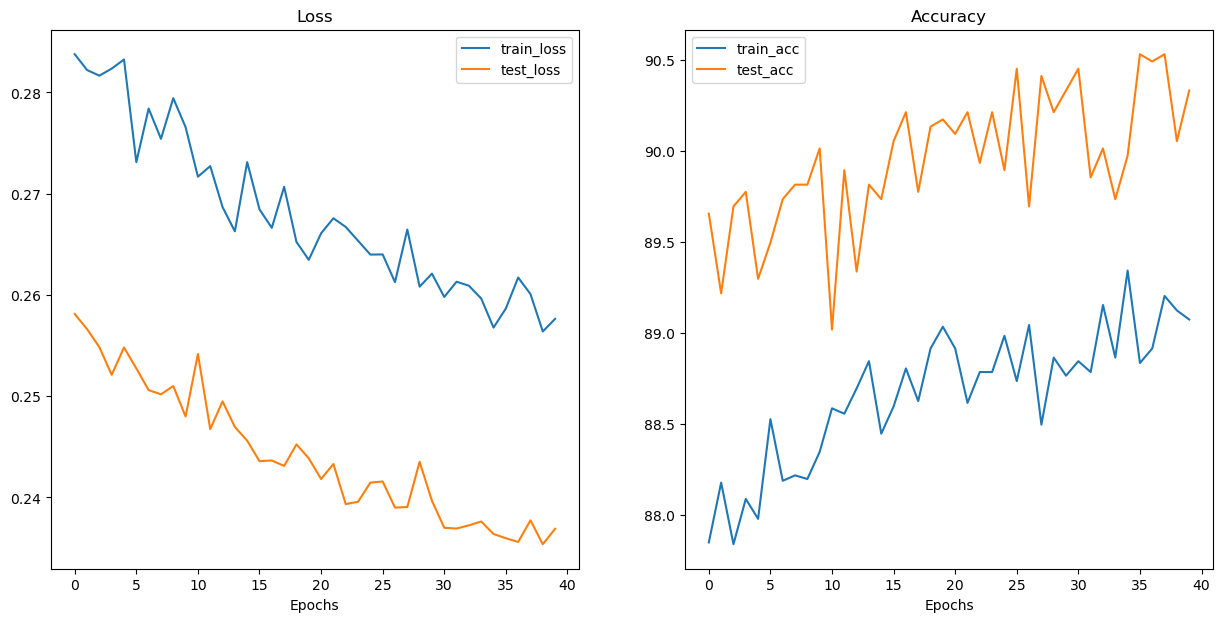

In [51]:
train(preTrainedModel, train_dataloader, test_dataloader)

## Model 0: TinyVGG 

In [5]:
class TinyVGG(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.Conv2d(
                in_channels=hidden_units,
                out_channels=hidden_units,
                kernel_size=3,
                stride=1,
                padding=0,
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units * 53 * 53, out_features=output_shape),
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [184]:
torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, hidden_units=10, output_shape=1).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=1, bias=True)
  )
)

### Trying a forward pass on a single image

In [185]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch, label_batch = image_batch.to(device), label_batch.to(device)
print(f"Image shape: {image_batch.shape}")
print(f"Label shape: {label_batch.shape}")

Image shape: torch.Size([32, 3, 224, 224])
Label shape: torch.Size([32])


In [186]:
model_0(image_batch)

tensor([[0.0352],
        [0.0363],
        [0.0359],
        [0.0359],
        [0.0375],
        [0.0350],
        [0.0362],
        [0.0357],
        [0.0362],
        [0.0359],
        [0.0364],
        [0.0357],
        [0.0358],
        [0.0355],
        [0.0369],
        [0.0365],
        [0.0361],
        [0.0365],
        [0.0359],
        [0.0365],
        [0.0350],
        [0.0364],
        [0.0368],
        [0.0365],
        [0.0362],
        [0.0365],
        [0.0366],
        [0.0356],
        [0.0367],
        [0.0353],
        [0.0360],
        [0.0356]], device='cuda:0', grad_fn=<AddmmBackward0>)

### Create a train and test loop

In [187]:
def train_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    device=device,
):
    model.train()
    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.float()

        y_logits = model(X).squeeze(dim=1)
        # print(f"y_logits shape: {y_logits.shape}")
        loss = loss_fn(y_logits, y)
        train_loss += loss.item()

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()

        y_pred_probs = torch.sigmoid(y_logits)  # Convert logits to probabilities
        y_pred_classes = (y_pred_probs >= 0.5).long()  # Class predictions
        train_acc += (y_pred_classes == y).sum().item() / len(y)

    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    return train_loss, train_acc

In [188]:
def test_step(
    model: torch.nn.Module,
    dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    device=device,
):
    model.eval()
    test_loss, test_acc = 0, 0

    with torch.inference_mode():
        for batch, (X, y) in enumerate(dataloader):
            X, y = X.to(device), y.to(device)
            y = y.float()

            test_pred_logits = model(X).squeeze(dim=1)
            # print(f"test_pred_logits shape : {test_pred_logits.shape}")
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            test_pred_probs = torch.sigmoid(
                test_pred_logits
            )  # Probabilities: [batch_size]
            test_pred_labels = (test_pred_probs >= 0.5).long()
            test_acc += (test_pred_labels == y).sum().item() / len(test_pred_logits)

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)
    return test_loss, test_acc

### Create a `train()` function to combine `train_step()` and `test_step()`

In [189]:
from tqdm.auto import tqdm


def train(
    model: torch.nn.Module,
    train_dataloader: torch.utils.data.DataLoader,
    test_dataloader: torch.utils.data.DataLoader,
    loss_fn: torch.nn.Module,
    optimizer: torch.optim.Optimizer,
    epochs: int,
    device=device,
):
    results = {"train_loss": [], "train_acc": [], "test_loss": [], "test_acc": []}

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(
            model=model,
            dataloader=train_dataloader,
            loss_fn=loss_fn,
            optimizer=optimizer,
            device=device,
        )

        test_loss, test_acc = test_step(
            model=model, dataloader=test_dataloader, loss_fn=loss_fn, device=device
        )

        print(
            f"Epoch: {epoch}  |  Train_loss: {train_loss:.4f}  |  Train_acc: {train_acc:.4f}  |  Test_loss: {test_loss:.4f}  |  Test_acc: {test_acc:.4f}"
        )

        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

### Train and evaluate model 0

In [192]:
torch.manual_seed(42)
# torch.cuda.manual_seed(42)

NUM_EPOCHS = 40

loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(params=model_0.parameters(), lr=0.0001)

from timeit import default_timer as timer

start_time = timer()

model_0_results = train(
    model=model_0,
    train_dataloader=train_dataloader,
    test_dataloader=test_dataloader,
    loss_fn=loss_fn,
    optimizer=optimizer,
    epochs=NUM_EPOCHS,
    device=device,
)

end_time = timer()
print(f"Total training time: {end_time - start_time:.3f} seconds.")

  2%|▎         | 1/40 [00:40<26:30, 40.79s/it]

Epoch: 0  |  Train_loss: 0.4763  |  Train_acc: 0.7939  |  Test_loss: 0.4401  |  Test_acc: 0.8258


  5%|▌         | 2/40 [01:22<26:00, 41.05s/it]

Epoch: 1  |  Train_loss: 0.4540  |  Train_acc: 0.8122  |  Test_loss: 0.4239  |  Test_acc: 0.8360


  8%|▊         | 3/40 [02:03<25:24, 41.21s/it]

Epoch: 2  |  Train_loss: 0.4386  |  Train_acc: 0.8201  |  Test_loss: 0.4110  |  Test_acc: 0.8463


 10%|█         | 4/40 [02:44<24:46, 41.29s/it]

Epoch: 3  |  Train_loss: 0.4267  |  Train_acc: 0.8239  |  Test_loss: 0.3987  |  Test_acc: 0.8369


 12%|█▎        | 5/40 [03:26<24:04, 41.27s/it]

Epoch: 4  |  Train_loss: 0.4171  |  Train_acc: 0.8272  |  Test_loss: 0.3867  |  Test_acc: 0.8456


 15%|█▌        | 6/40 [04:07<23:23, 41.27s/it]

Epoch: 5  |  Train_loss: 0.4073  |  Train_acc: 0.8325  |  Test_loss: 0.3836  |  Test_acc: 0.8510


 18%|█▊        | 7/40 [04:48<22:43, 41.33s/it]

Epoch: 6  |  Train_loss: 0.4016  |  Train_acc: 0.8325  |  Test_loss: 0.3754  |  Test_acc: 0.8518


 20%|██        | 8/40 [05:31<22:12, 41.63s/it]

Epoch: 7  |  Train_loss: 0.3950  |  Train_acc: 0.8360  |  Test_loss: 0.3750  |  Test_acc: 0.8565


 22%|██▎       | 9/40 [06:13<21:39, 41.93s/it]

Epoch: 8  |  Train_loss: 0.3906  |  Train_acc: 0.8369  |  Test_loss: 0.3689  |  Test_acc: 0.8538


 25%|██▌       | 10/40 [06:55<20:52, 41.76s/it]

Epoch: 9  |  Train_loss: 0.3859  |  Train_acc: 0.8413  |  Test_loss: 0.3692  |  Test_acc: 0.8503


 28%|██▊       | 11/40 [07:36<20:06, 41.59s/it]

Epoch: 10  |  Train_loss: 0.3819  |  Train_acc: 0.8428  |  Test_loss: 0.3639  |  Test_acc: 0.8557


 30%|███       | 12/40 [08:27<20:45, 44.48s/it]

Epoch: 11  |  Train_loss: 0.3772  |  Train_acc: 0.8462  |  Test_loss: 0.3654  |  Test_acc: 0.8608


 32%|███▎      | 13/40 [09:21<21:21, 47.45s/it]

Epoch: 12  |  Train_loss: 0.3716  |  Train_acc: 0.8464  |  Test_loss: 0.3594  |  Test_acc: 0.8600


 35%|███▌      | 14/40 [10:16<21:29, 49.60s/it]

Epoch: 13  |  Train_loss: 0.3661  |  Train_acc: 0.8497  |  Test_loss: 0.3576  |  Test_acc: 0.8612


 38%|███▊      | 15/40 [11:10<21:18, 51.13s/it]

Epoch: 14  |  Train_loss: 0.3634  |  Train_acc: 0.8518  |  Test_loss: 0.3568  |  Test_acc: 0.8663


 40%|████      | 16/40 [12:00<20:15, 50.64s/it]

Epoch: 15  |  Train_loss: 0.3584  |  Train_acc: 0.8533  |  Test_loss: 0.3613  |  Test_acc: 0.8553


 42%|████▎     | 17/40 [14:12<28:48, 75.17s/it]

Epoch: 16  |  Train_loss: 0.3555  |  Train_acc: 0.8539  |  Test_loss: 0.3537  |  Test_acc: 0.8644


 45%|████▌     | 18/40 [14:54<23:51, 65.06s/it]

Epoch: 17  |  Train_loss: 0.3504  |  Train_acc: 0.8590  |  Test_loss: 0.3532  |  Test_acc: 0.8648


 48%|████▊     | 19/40 [15:35<20:16, 57.92s/it]

Epoch: 18  |  Train_loss: 0.3483  |  Train_acc: 0.8560  |  Test_loss: 0.3572  |  Test_acc: 0.8628


 50%|█████     | 20/40 [16:16<17:38, 52.94s/it]

Epoch: 19  |  Train_loss: 0.3440  |  Train_acc: 0.8573  |  Test_loss: 0.3579  |  Test_acc: 0.8604


 52%|█████▎    | 21/40 [16:58<15:39, 49.44s/it]

Epoch: 20  |  Train_loss: 0.3403  |  Train_acc: 0.8631  |  Test_loss: 0.3548  |  Test_acc: 0.8608


 55%|█████▌    | 22/40 [17:39<14:07, 47.07s/it]

Epoch: 21  |  Train_loss: 0.3353  |  Train_acc: 0.8635  |  Test_loss: 0.3515  |  Test_acc: 0.8584


 57%|█████▊    | 23/40 [18:20<12:51, 45.38s/it]

Epoch: 22  |  Train_loss: 0.3312  |  Train_acc: 0.8649  |  Test_loss: 0.3528  |  Test_acc: 0.8573


 60%|██████    | 24/40 [19:02<11:49, 44.34s/it]

Epoch: 23  |  Train_loss: 0.3259  |  Train_acc: 0.8653  |  Test_loss: 0.3458  |  Test_acc: 0.8620


 62%|██████▎   | 25/40 [19:44<10:53, 43.54s/it]

Epoch: 24  |  Train_loss: 0.3211  |  Train_acc: 0.8704  |  Test_loss: 0.3476  |  Test_acc: 0.8597


 65%|██████▌   | 26/40 [20:26<10:00, 42.92s/it]

Epoch: 25  |  Train_loss: 0.3169  |  Train_acc: 0.8709  |  Test_loss: 0.3426  |  Test_acc: 0.8640


 68%|██████▊   | 27/40 [21:07<09:11, 42.40s/it]

Epoch: 26  |  Train_loss: 0.3106  |  Train_acc: 0.8759  |  Test_loss: 0.3392  |  Test_acc: 0.8652


 70%|███████   | 28/40 [21:48<08:25, 42.09s/it]

Epoch: 27  |  Train_loss: 0.3092  |  Train_acc: 0.8736  |  Test_loss: 0.3418  |  Test_acc: 0.8629


 72%|███████▎  | 29/40 [22:30<07:41, 41.94s/it]

Epoch: 28  |  Train_loss: 0.3054  |  Train_acc: 0.8750  |  Test_loss: 0.3388  |  Test_acc: 0.8656


 75%|███████▌  | 30/40 [23:12<06:59, 41.95s/it]

Epoch: 29  |  Train_loss: 0.2987  |  Train_acc: 0.8774  |  Test_loss: 0.3323  |  Test_acc: 0.8675


 78%|███████▊  | 31/40 [23:53<06:15, 41.77s/it]

Epoch: 30  |  Train_loss: 0.2916  |  Train_acc: 0.8819  |  Test_loss: 0.3389  |  Test_acc: 0.8616


 80%|████████  | 32/40 [24:34<05:32, 41.60s/it]

Epoch: 31  |  Train_loss: 0.2882  |  Train_acc: 0.8844  |  Test_loss: 0.3310  |  Test_acc: 0.8667


 82%|████████▎ | 33/40 [25:15<04:50, 41.48s/it]

Epoch: 32  |  Train_loss: 0.2848  |  Train_acc: 0.8840  |  Test_loss: 0.3338  |  Test_acc: 0.8656


 85%|████████▌ | 34/40 [25:57<04:08, 41.47s/it]

Epoch: 33  |  Train_loss: 0.2779  |  Train_acc: 0.8869  |  Test_loss: 0.3779  |  Test_acc: 0.8487


 88%|████████▊ | 35/40 [26:38<03:27, 41.47s/it]

Epoch: 34  |  Train_loss: 0.2739  |  Train_acc: 0.8871  |  Test_loss: 0.3212  |  Test_acc: 0.8735


 90%|█████████ | 36/40 [27:20<02:45, 41.41s/it]

Epoch: 35  |  Train_loss: 0.2663  |  Train_acc: 0.8957  |  Test_loss: 0.3422  |  Test_acc: 0.8617


 92%|█████████▎| 37/40 [28:01<02:04, 41.38s/it]

Epoch: 36  |  Train_loss: 0.2586  |  Train_acc: 0.8956  |  Test_loss: 0.3074  |  Test_acc: 0.8763


 95%|█████████▌| 38/40 [28:42<01:22, 41.36s/it]

Epoch: 37  |  Train_loss: 0.2543  |  Train_acc: 0.8961  |  Test_loss: 0.3137  |  Test_acc: 0.8743


 98%|█████████▊| 39/40 [29:23<00:41, 41.31s/it]

Epoch: 38  |  Train_loss: 0.2459  |  Train_acc: 0.8999  |  Test_loss: 0.2972  |  Test_acc: 0.8834


100%|██████████| 40/40 [30:05<00:00, 45.13s/it]

Epoch: 39  |  Train_loss: 0.2408  |  Train_acc: 0.9010  |  Test_loss: 0.3019  |  Test_acc: 0.8810
Total training time: 1805.308 seconds.


In [193]:
model_0_results.keys()

dict_keys(['train_loss', 'train_acc', 'test_loss', 'test_acc'])

In [48]:
def plot_loss_curves(results):
    """PLots training curves of a results dictionary

    Args:
        results (Dict[str, List[float]]): e.g.
        {"train_loss": [...],
         "train_acc": [...],
         "test_loss": [...],
         "test_acc": [...]}
    """

    # Get the loss values
    loss = results["train_loss"]
    test_loss = results["test_loss"]

    # Get the accuracy values
    accuracy = results["train_acc"]
    test_accuracy = results["test_acc"]

    # Figure out how many epochs
    epochs = range(len(results["train_loss"]))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label="train_loss")
    plt.plot(epochs, test_loss, label="test_loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()

    # plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label="train_acc")
    plt.plot(epochs, test_accuracy, label="test_acc")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

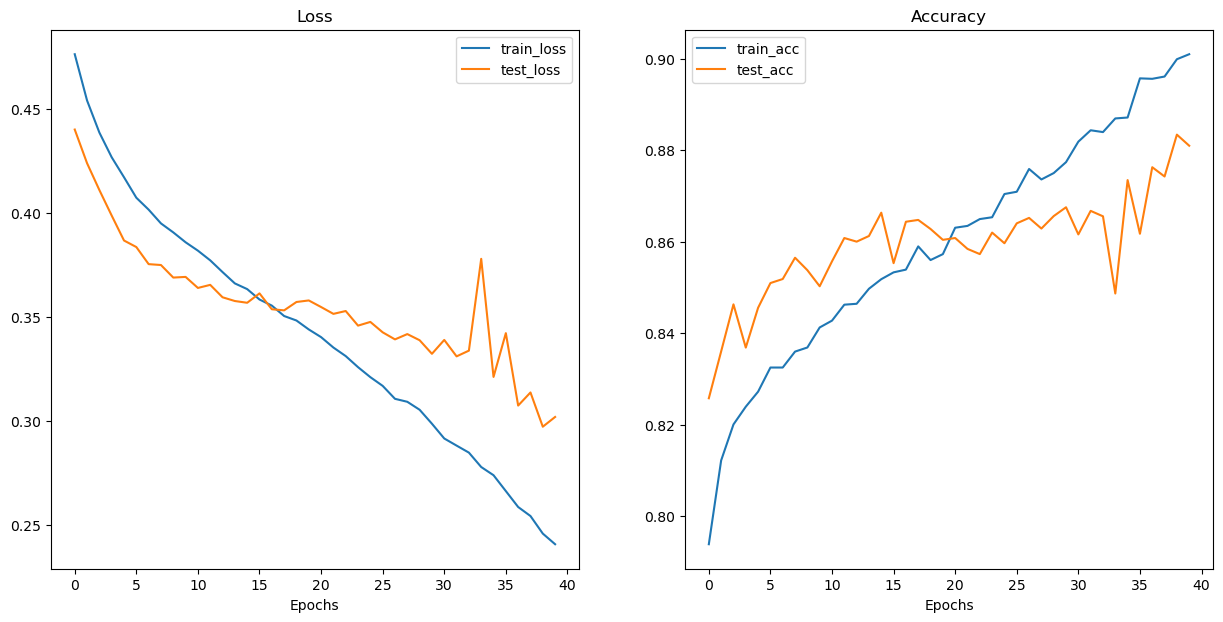

In [195]:
plot_loss_curves(model_0_results)

### Prediction on test data

In [196]:
def make_predictions(
    model: torch.nn.Module,
    data: torch.utils.data.DataLoader,
    device: torch.device = device,
):
    """Make prediction on a given list of data and returns a stacked list of prediction.

    Args:
        model (torch.nn.Module):
        data (List):
        device (torch.device, optional): Defaults to device.
    """
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logit = model(sample).squeeze(dim=1)

            pred_prob = torch.sigmoid(pred_logit.squeeze())
            # pred_classes = (pred_probs >= 0.5).long()

            pred_probs.append(pred_prob.cpu())

    return torch.stack(pred_probs)

In [197]:
next(iter(test_data))

(tensor([[[0.0235, 0.0275, 0.0275,  ..., 0.0392, 0.0824, 0.0863],
          [0.0157, 0.0157, 0.0078,  ..., 0.0353, 0.0510, 0.0510],
          [0.0549, 0.0118, 0.0039,  ..., 0.0392, 0.0275, 0.0275],
          ...,
          [0.0314, 0.0510, 0.0392,  ..., 0.0627, 0.0510, 0.0431],
          [0.0118, 0.0196, 0.0314,  ..., 0.0157, 0.0157, 0.0314],
          [0.0510, 0.0392, 0.0706,  ..., 0.0353, 0.0353, 0.0314]],
 
         [[0.0510, 0.0588, 0.0549,  ..., 0.0235, 0.0667, 0.0667],
          [0.0314, 0.0392, 0.0235,  ..., 0.0196, 0.0314, 0.0314],
          [0.0588, 0.0157, 0.0118,  ..., 0.0235, 0.0078, 0.0078],
          ...,
          [0.0510, 0.0706, 0.0588,  ..., 0.0471, 0.0392, 0.0275],
          [0.0275, 0.0353, 0.0510,  ..., 0.0118, 0.0078, 0.0196],
          [0.0706, 0.0627, 0.0941,  ..., 0.0392, 0.0392, 0.0314]],
 
         [[0.1176, 0.1059, 0.0745,  ..., 0.0196, 0.0510, 0.0510],
          [0.1059, 0.0941, 0.0510,  ..., 0.0118, 0.0196, 0.0157],
          [0.1412, 0.0824, 0.0471,  ...,

In [198]:
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

print(
    f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} {class_names[test_labels[0]]}"
)

Test sample image shape: torch.Size([3, 224, 224])
Test sample label: 0 Au


In [199]:
pred_probs = make_predictions(model=model_0, data=test_samples)

pred_probs[:2]

tensor([0.8124, 0.0011])

In [200]:
pred_classes = (pred_probs >= 0.5).long()
pred_classes

tensor([1, 0, 0, 0, 0, 1, 0, 1, 0])

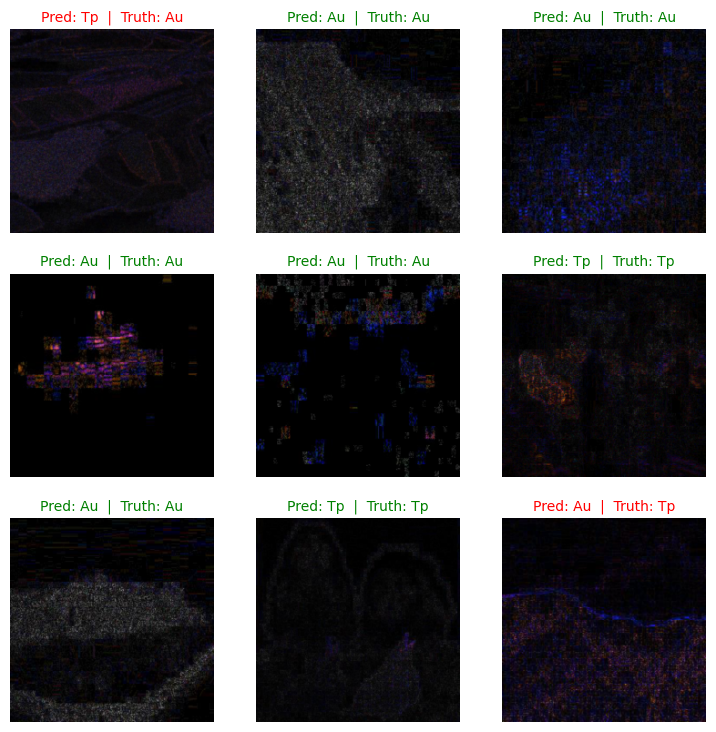

In [201]:
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(sample.squeeze().permute(1, 2, 0), cmap="gray")
    pred_label = class_names[pred_classes[i]]
    truth_label = class_names[test_labels[i]]
    title_text = f"Pred: {pred_label}  |  Truth: {truth_label}"
    if pred_label == truth_label:
        plt.title(title_text, fontsize=10, c="g")
    else:
        plt.title(title_text, fontsize=10, c="r")

    plt.axis(False)

## Confusion Matrix, Accuracy, F1 Score 

In [202]:
y_preds = []

model_0.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making predictions...."):
        X, y = X.to(device), y.to(device)

        y_logit = model_0(X).squeeze(dim=1)
        y_pred = torch.sigmoid(y_logit.squeeze())
        y_pred = (y_pred >= 0.5).long()
        y_preds.append(y_pred.cpu())

y_pred_tensor = torch.cat(y_preds)
y_pred_tensor

Making predictions....: 100%|██████████| 79/79 [00:07<00:00, 10.39it/s]


tensor([0, 0, 0,  ..., 1, 1, 1])

In [203]:
y_pred_tensor

tensor([0, 0, 0,  ..., 1, 1, 1])

In [204]:
import torchmetrics
from torchmetrics import ConfusionMatrix, F1Score, Precision, Recall
# # from torcheval.metrics import BinaryConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

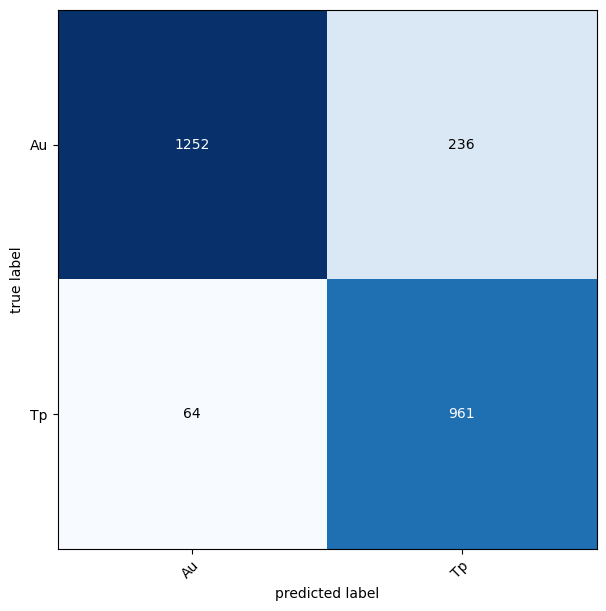

In [ ]:
targets_tensor = torch.tensor(test_data.targets)
confmat = ConfusionMatrix(task="binary", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor, target=targets_tensor)
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), class_names=class_names, figsize=(10, 7)
)

In [206]:
# Precision
precision = Precision(task="binary")  # For binary classification
precision_score = precision(preds=y_pred_tensor, target=targets_tensor)

# Recall
recall = Recall(task="binary")  # For binary classification
recall_score = recall(preds=y_pred_tensor, target=targets_tensor)

# F1 Score
f1 = F1Score(task="binary")
f1_score = f1(preds=y_pred_tensor, target=targets_tensor)

# Print the results
print(f"Precision: {precision_score.item()}")
print(f"Recall: {recall_score.item()}")
print(f"F1 Score: {f1_score.item()}")

Precision: 0.8028404116630554
Recall: 0.9375609755516052
F1 Score: 0.8649864792823792


## Saving and loading Model

In [207]:
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "TinyVGG-Model-1-Epoch-40.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

Saving model to: models\TinyVGG-Model-1-Epoch-40.pth


In [20]:
model = TinyVGG(input_shape=3, hidden_units=10, output_shape=1).to(device)
model.load_state_dict(torch.load("models/TinyVGG-Model-1-Epoch-40.pth", weights_only=True))
model.eval()

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=28090, out_features=1, bias=True)
  )
)

In [ ]:
custom_image_path = r"custom-test-images\Au_ani_10111.jpg"
custom_image = Image.open(custom_image_path)
# custom_image = torchvision.io.read_image(str(custom_image_path)).float() / 255.0
print(f"Custom image tensor: {custom_image}")
# print(f"Custom image shape: {custom_image.shape}")
# print(f"Custom image datatype: {custom_image.dtype}")
type(custom_image)

Custom image tensor: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=500x375 at 0x2A9AC4A9A70>


PIL.JpegImagePlugin.JpegImageFile

Max pixel difference in ELA: 69


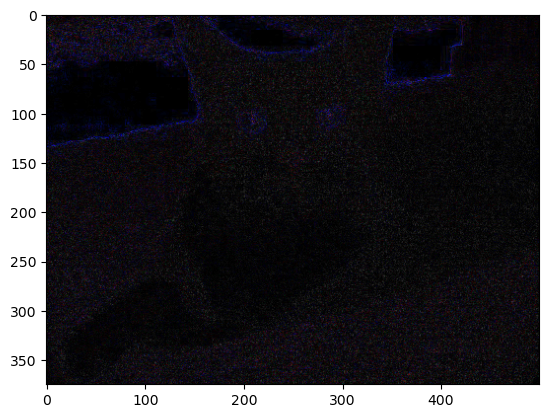

In [66]:
output_image_path = "ela_test.jpg"
custom_ela_image = convert_to_ela_image(custom_image_path, output_image_path)

(np.float64(-0.5), np.float64(499.5), np.float64(374.5), np.float64(-0.5))

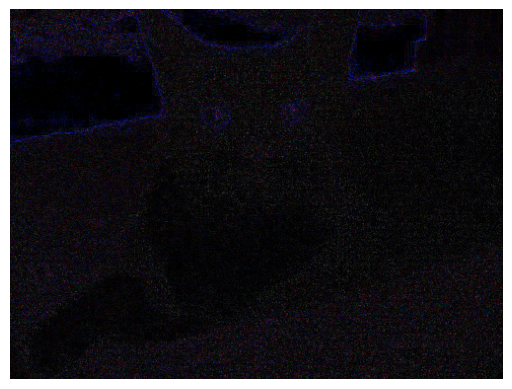

In [54]:
plt.imshow(custom_ela_image)
plt.axis(False)

In [55]:
custom_image_transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()  # Resize image to 224x224
])

# Transform the ELA image
custom_image_transformed = custom_image_transform(custom_ela_image)
type(custom_image_transformed)

torch.Tensor

In [56]:
custom_image_transformed.shape

torch.Size([3, 224, 224])

In [57]:

# Print shapes correctly
print(f"Original shape: {custom_image.shape}")  # PyTorch Tensor (C, H, W)
print(f"Transformed shape: {custom_image_transformed.shape}")  # PyTorch Tensor (C, 224, 224)


AttributeError: shape

(np.float64(-0.5), np.float64(223.5), np.float64(223.5), np.float64(-0.5))

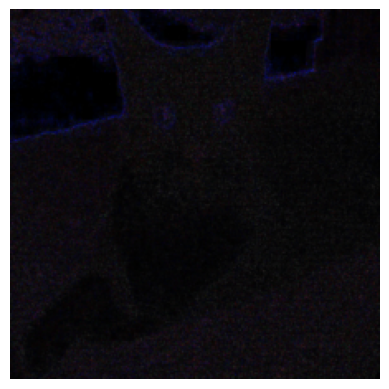

In [58]:
plt.imshow(custom_image_transformed.permute(1, 2, 0))
plt.axis(False)


In [59]:
custom_image_transformed.unsqueeze(0).shape

torch.Size([1, 3, 224, 224])

In [64]:
model.eval()
with torch.inference_mode() :
    custom_image_logit = model(custom_image_transformed.unsqueeze(0).to(device))
    custom_image_probs = torch.sigmoid(custom_image_logit.squeeze())
    predicted_label = (custom_image_probs >= 0.8).long()
predicted_label

tensor(1, device='cuda:0')

In [50]:
# predicted_label = (custom_pred_prob > 0.5).long().item()  # Convert probability to 0 or 1
class_name = class_names[predicted_label]  # Map to class name
print(class_name)


NameError: name 'class_names' is not defined